**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

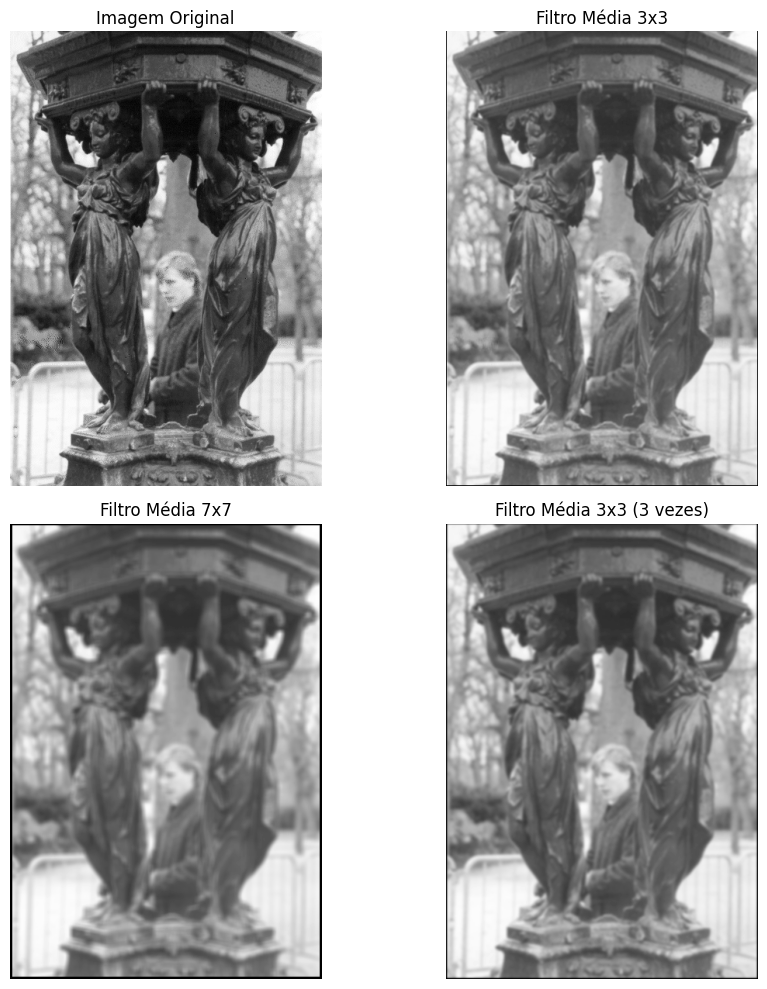

In [4]:
img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)


def filtro_media_manual(imagem, tamanho_mascara):
    
    altura, largura = imagem.shape
    
    borda = tamanho_mascara // 2
    
    imagem_filtrada = np.zeros((altura, largura), dtype=np.uint8)
    
    for i in range(borda, altura - borda):
        for j in range(borda, largura - borda):
            
            janela = imagem[i-borda:i+borda+1, j-borda:j+borda+1]
            
            valor_medio = np.mean(janela)
            
            imagem_filtrada[i, j] = valor_medio
    
    return imagem_filtrada

def aplicar_filtro_media_sequencial(imagem, tamanho_mascara, vezes):
    imagem_filtrada = imagem.copy()
    for _ in range(vezes):
        imagem_filtrada = filtro_media_manual(imagem_filtrada, tamanho_mascara)
    return imagem_filtrada


imagem_3x3 = filtro_media_manual(img1, 3)
imagem_7x7 = filtro_media_manual(img1, 7)
imagem_3x3_sequencial = aplicar_filtro_media_sequencial(img1, 3, 3)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('Imagem Original')
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Filtro Média 3x3')
plt.imshow(imagem_3x3, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Filtro Média 7x7')
plt.imshow(imagem_7x7, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Filtro Média 3x3 (3 vezes)')
plt.imshow(imagem_3x3_sequencial, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

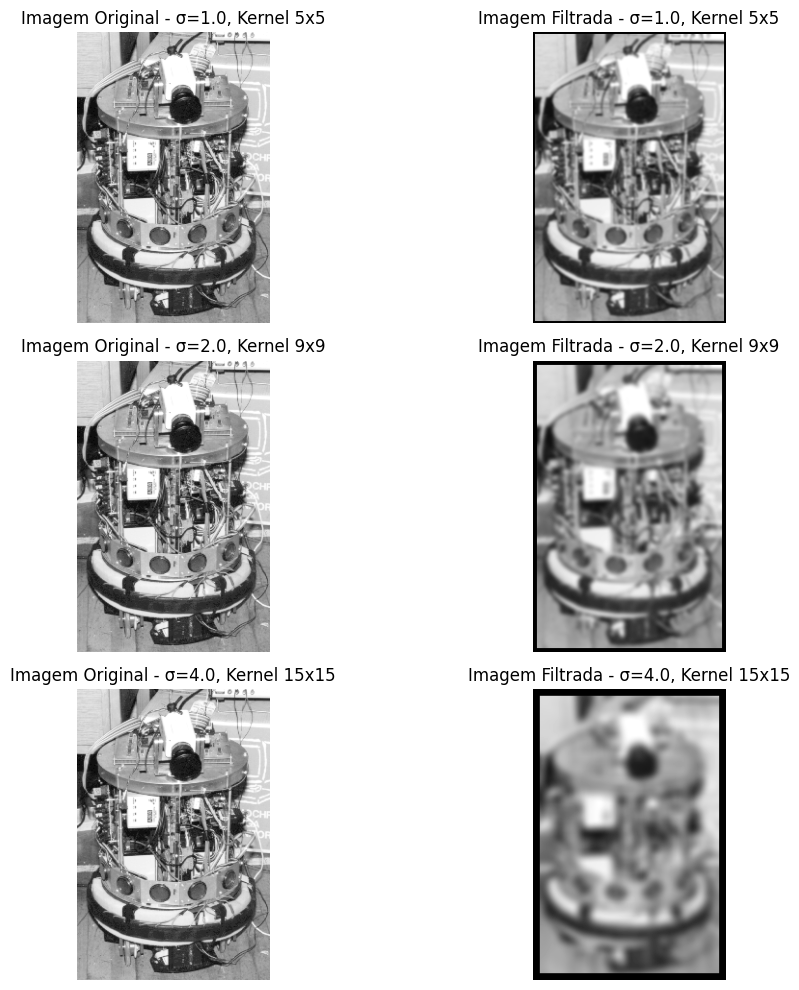

In [13]:
def gerar_kernel_gaussiano(tamanho, sigma):
    """Gera um kernel gaussiano 2D."""
    ax = np.linspace(-(tamanho // 2), tamanho // 2, tamanho)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)  # Normalizando
    return kernel

def aplicar_filtro_gaussiano(imagem, kernel):
    borda = kernel.shape[0] // 2
    imagem_filtrada = np.zeros_like(imagem, dtype=float)
    
    for i in range(borda, imagem.shape[0] - borda):
        for j in range(borda, imagem.shape[1] - borda):
            janela = imagem[i-borda:i+borda+1, j-borda:j+borda+1]
            imagem_filtrada[i, j] = np.sum(janela * kernel)
    
    return np.clip(imagem_filtrada, 0, 255).astype(np.uint8)


imagem = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

configs = [
    {'sigma': 1.0, 'kernel_size': 5},
    {'sigma': 2.0, 'kernel_size': 9},
    {'sigma': 4.0, 'kernel_size': 15}
]

plt.figure(figsize=(12, 10))

for idx, config in enumerate(configs):
    sigma = config['sigma']
    kernel_size = config['kernel_size']
    
    kernel_gaussiano = gerar_kernel_gaussiano(kernel_size, sigma)
    
    imagem_filtrada = aplicar_filtro_gaussiano(imagem, kernel_gaussiano)
    
    plt.subplot(3, 2, 2 * idx + 1)
    plt.title(f'Imagem Original - σ={sigma}, Kernel {kernel_size}x{kernel_size}')
    plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 2, 2 * idx + 2)
    plt.title(f'Imagem Filtrada - σ={sigma}, Kernel {kernel_size}x{kernel_size}')
    plt.imshow(imagem_filtrada, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

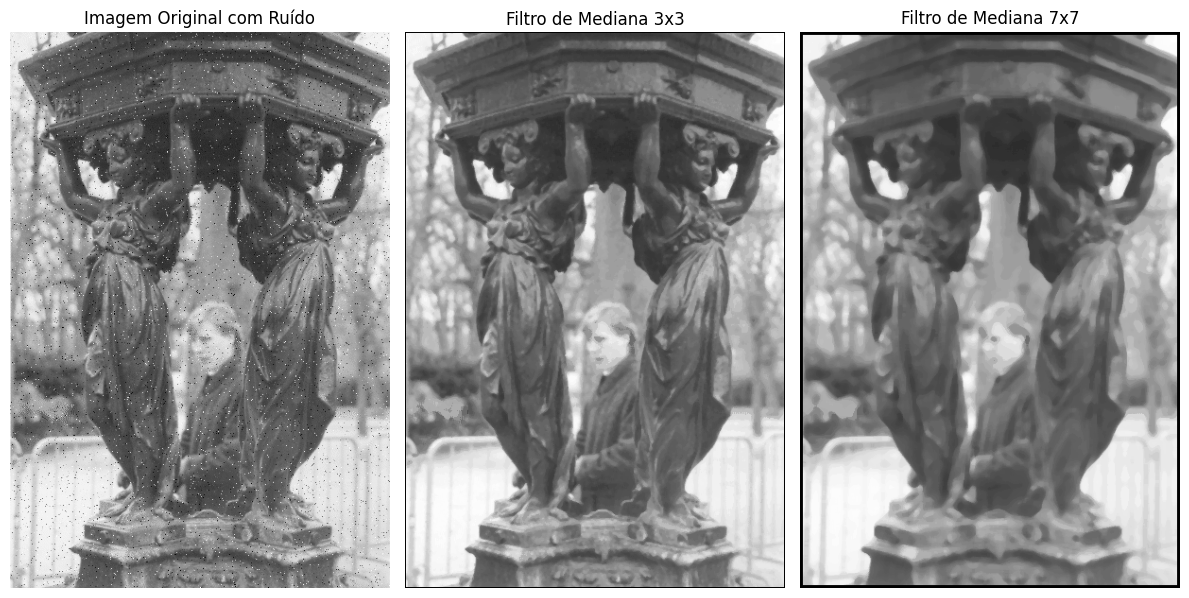

In [14]:
def aplicar_filtro_mediana(imagem, tamanho_mascara):
    """Aplica o filtro de mediana a uma imagem com a máscara de tamanho definido."""
    borda = tamanho_mascara // 2
    imagem_filtrada = np.zeros_like(imagem, dtype=float)
    
    for i in range(borda, imagem.shape[0] - borda):
        for j in range(borda, imagem.shape[1] - borda):
           
            janela = imagem[i-borda:i+borda+1, j-borda:j+borda+1]
            
            imagem_filtrada[i, j] = np.median(janela)
    
    return np.clip(imagem_filtrada, 0, 255).astype(np.uint8)

img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

imagem_filtrada_3x3 = aplicar_filtro_mediana(img3, 3)
imagem_filtrada_7x7 = aplicar_filtro_mediana(img3, 7)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('Imagem Original com Ruído')
plt.imshow(img3, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Filtro de Mediana 3x3')
plt.imshow(imagem_filtrada_3x3, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Filtro de Mediana 7x7')
plt.imshow(imagem_filtrada_7x7, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

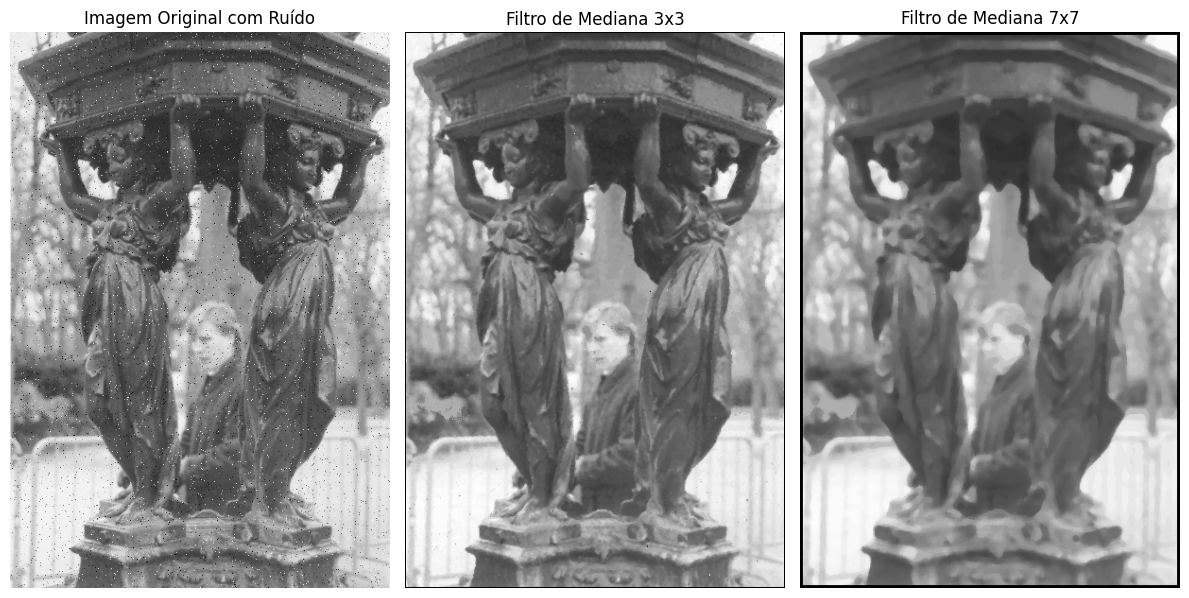

In [15]:
img4 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

imagem_filtrada_3x3 = aplicar_filtro_mediana(img4, 3)
imagem_filtrada_7x7 = aplicar_filtro_mediana(img4, 7)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('Imagem Original com Ruído')
plt.imshow(img3, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Filtro de Mediana 3x3')
plt.imshow(imagem_filtrada_3x3, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Filtro de Mediana 7x7')
plt.imshow(imagem_filtrada_7x7, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()